## Healthcare for All

The idea here is to recap data cleaning and feature engineering, while simulating a job interview case study.

You have been assigned a task to solve the case study related to HealthCare for All dataset, where you will deliver an end-to-end Exploratory Data Analysis and Machine Learning process.

The plan for the next two classes is to apply the data cleaning and feature engineering techniques we have learned so far.

We will be working with this same notebook/case study throughout the whole unit, so take your time and make it nice and organized.

Hints:
* Read the case study and reason about the problem as you would if this was a job interview case study;
* Read the columns descriptions;
* Choose the appropriate columns (we are working with a 450+ columns dataset);
* Deal with all the nulls;
* Separated categorical and numericals;
* Make your notebook comprehensible and easy to navigate;
* Watch out, you might exclude columns that I might want to use for examples, so make sure you make it easy to include them back in;
* Train a basic model to be our benchmark;

Don't worry about the labs, you will use them to guide/inspire you through this activity, but labs 7.01 and 7.02 are not priority (you will be doing your own work here and submitting this instead).

**Purpose:** being able to predict who will donate, without losing donors of high amounts.

**Strategy:**
* find out best approach/model before proper data cleaning (too many columns, too little time)
* do feature selection to see what columns are more important for the chosen model
* data cleaning
* hyperparameter tuning

### EDA

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv('7.01/learningSet.csv')

In [3]:
data.shape

(95412, 481)

In [8]:
list(data.columns)

['ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'CLUSTER',
 'AGE',
 'AGEFLAG',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ET

In [6]:
data[['TARGET_B','TARGET_D']]

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [4]:
data.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


Here we notice the huge data imbalance between people who did not donate and people who donated, speacially if we are talking about the high amount donors:

In [5]:
len(data[data['TARGET_D'] > 20]['TARGET_D']), len(data[data['TARGET_D'] > 50]['TARGET_D'])

(950, 46)

Here we notice there are no highly correlated columns, which is likely to reflect in a bad fit for linear regression:

In [6]:
data.corr()['TARGET_D'].sort_values(ascending=False)

TARGET_D    1.000000
TARGET_B    0.774232
RAMNT_4     0.268811
RAMNT_21    0.099339
RAMNT_9     0.090168
              ...   
RDATE_3    -0.125194
RDATE_5    -0.220455
RAMNT_5    -0.272147
ADATE_5          NaN
ADATE_15         NaN
Name: TARGET_D, Length: 407, dtype: float64

### Data "Cleaning"

In [7]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False).head(80)

,percentage
RDATE_5,99.990567
RAMNT_5,99.990567
RDATE_3,99.746363
RAMNT_3,99.746363
RDATE_4,99.705488
...,...
ADATE_16,21.343227
ADATE_14,19.774242
ADATE_9,11.785729
ADATE_11,10.923154


RAMNT columns might have some correlation with the target, but has many nulls, that actually represents 0, so let's fill these nans:

In [8]:
data['RAMNT_4'].unique()

array([   nan,  10.  ,   1.  ,  15.  ,   5.  ,   2.  ,  25.  ,  20.  ,
         9.  ,  16.77,   3.  ,   7.  ,   4.  ,  13.  ,  50.  ,  12.  ,
        35.  ,  30.  ,  11.  ,  26.  ,  40.  ,  17.  , 100.  ,   6.  ,
        14.  ,  16.  ,   8.  ,  32.  ,  36.  ,  20.5 ,  24.  ,   7.5 ,
        18.  ])

In [9]:
for col in data.columns:
    if 'RAMNT' in col:
        data[col] = data[col].fillna(0)
        
data.corr()['TARGET_D'].sort_values(ascending=False)    

TARGET_D    1.000000
TARGET_B    0.774232
LASTGIFT    0.061678
RAMNTALL    0.044810
AVGGIFT     0.044299
              ...   
RDATE_6    -0.039446
RDATE_3    -0.125194
RDATE_5    -0.220455
ADATE_5          NaN
ADATE_15         NaN
Name: TARGET_D, Length: 407, dtype: float64

* no significant increase in correlations.

Due to the high amount of columns and the time limit for the analysis, removing columns with higher percentage of nulls and remaining row with nulls:

In [10]:
cols_to_keep = list(nulls[nulls['percentage'] < 10].index)
cols_to_keep

['ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'CLUSTER',
 'AGEFLAG',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'GENDER',
 'HIT',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',


To avoid losing rows with donors of higher amounts, i'll deal with the nulls from ADATE columns by dropping them, keeping only MAXADATE, which informs the last promotion responded by the donor:

In [11]:
nulls_high_donors = data[data['TARGET_D'] > 20][cols_to_keep].isna().sum() 
nulls_high_donors[nulls_high_donors > 0]

ADATE_3      41
ADATE_4      40
ADATE_6      39
ADATE_7      98
ADATE_8      47
ADATE_12    115
dtype: int64

In [12]:
data['ADATE_22'].unique()

array([9409., 9506., 9408.,   nan, 9410., 9411.])

In [13]:
cols_to_remove = [col for col in data.columns if 'ADATE_' in col and col in cols_to_keep]
cols_to_remove

['ADATE_2', 'ADATE_3', 'ADATE_4', 'ADATE_6', 'ADATE_7', 'ADATE_8', 'ADATE_12']

In [14]:
[cols_to_keep.remove(col) for col in cols_to_remove]
cols_to_keep = list(set(cols_to_keep))
sorted(cols_to_keep)

['AC1',
 'AC2',
 'ADI',
 'AFC1',
 'AFC2',
 'AFC3',
 'AFC4',
 'AFC5',
 'AFC6',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'AGEFLAG',
 'ANC1',
 'ANC10',
 'ANC11',
 'ANC12',
 'ANC13',
 'ANC14',
 'ANC15',
 'ANC2',
 'ANC3',
 'ANC4',
 'ANC5',
 'ANC6',
 'ANC7',
 'ANC8',
 'ANC9',
 'AVGGIFT',
 'BIBLE',
 'BOATS',
 'CARDGIFT',
 'CARDPM12',
 'CARDPROM',
 'CARDS',
 'CATLG',
 'CDPLAY',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'CLUSTER',
 'CLUSTER2',
 'COLLECT1',
 'CONTROLN',
 'CRAFTS',
 'DATASRCE',
 'DMA',
 'DOB',
 'DOMAIN',
 'DW1',
 'DW2',
 'DW3',
 'DW4',
 'DW5',
 'DW6',
 'DW7',
 'DW8',
 'DW9',
 'EC1',
 'EC2',
 'EC3',
 'EC4',
 'EC5',
 'EC6',
 'EC7',
 'EC8',
 'EIC1',
 'EIC10',
 'EIC11',
 'EIC12',
 'EIC13',
 'EIC14',
 'EIC15',
 'EIC16',
 'EIC2',
 'EIC3',
 'EIC4',
 'EIC5',
 'EIC6',
 'EIC7',
 'EIC8',
 'EIC9'

In [15]:
data_no_nulls = data[cols_to_keep].dropna()
data_no_nulls

,CHILD18,AGE903,RFA_24,RFA_8,COLLECT1,LIFESRC,TPE7,AGEC6,POP901,EC2,...,EIC15,ETH16,HHD4,AGE902,RFA_15,PVASTATE,OCC13,HHD3,IC6,ETHC3
0,,51,S4E,S4E,,,0,11,992,16,...,1,0,32,48,S4E,,4,70,13,25
1,M,43,F1E,A1E,,,0,4,3611,5,...,11,4,55,41,,,3,88,2,5
2,,46,S3D,S4F,,,0,10,7001,22,...,3,0,30,43,S4F,,7,65,32,18
3,,44,,S4E,,,0,7,640,28,...,3,1,30,40,S4E,,0,61,27,13
4,,50,A3D,A1E,,3,0,12,2520,16,...,4,0,22,45,,,2,49,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,,38,,P1G,,,0,3,27380,2,...,7,2,32,35,,,3,56,11,5
95408,M,40,,P1F,,,0,4,1254,1,...,13,1,60,40,,,5,85,8,5
95409,,37,,A2E,,,0,9,552,5,...,3,0,21,35,N2E,,2,43,21,12
95410,,45,S3F,S4F,,1,1,7,1746,7,...,9,3,36,42,S4F,,2,71,7,16


In [16]:
# checking if any importat rows (high amount donors) were dropped
len(data_no_nulls[data_no_nulls['TARGET_D'] > 50])

46

In [17]:
dfcat = data_no_nulls.select_dtypes(object)
dfnum = data_no_nulls.select_dtypes(np.number)

To deal with categorical columns that have a lot of different categories, removing the columns with more than 50 categories:

In [18]:
remove_cols = []

for col in dfcat:
    if len(dfcat[col].unique()) > 50:
        display(dfcat[col].value_counts())
        remove_cols.append(col)
        
len(remove_cols)

       36926
A1E     7220
A1F     5022
A1D     4553
F1D     3311
       ...  
A1C        2
U1C        2
N1C        2
U1G        1
L4C        1
Name: RFA_24, Length: 97, dtype: int64

A1F    11296
A1E     6891
A1G     5054
A2F     4954
F1F     3979
       ...  
N4C        2
U1D        1
I3E        1
L4C        1
L3C        1
Name: RFA_8, Length: 109, dtype: int64

A1F    15672
F1F     6696
A1G     6623
A1E     5423
A2F     5349
       ...  
A2B        1
P1A        1
U1C        1
I1D        1
P1G        1
Name: RFA_6, Length: 109, dtype: int64

A1F    21918
A1G     9168
A2F     6275
F1F     5966
A1E     5113
       ...  
A3C        2
S4B        2
S3B        1
A2C        1
N1C        1
Name: RFA_3, Length: 71, dtype: int64

A1F    21787
A1G     9082
A2F     6257
F1F     5991
A1E     5055
       ...  
S2C        4
S3C        3
S4B        2
A3C        2
S3B        1
Name: RFA_4, Length: 64, dtype: int64

85351     61
92653     59
85710     54
95608     50
92037     45
          ..
93242      1
48006      1
48630      1
68134-     1
94940      1
Name: ZIP, Length: 19867, dtype: int64

       21240
A1E     7176
A1F     5498
A1D     3933
A1G     2403
       ...  
S2A        1
N3B        1
P1B        1
A4A        1
S3A        1
Name: RFA_18, Length: 122, dtype: int64

       10411
A1F     9732
A1E     7018
A1G     4137
A2F     3729
       ...  
S3B        8
A4B        4
S2B        4
A3B        3
A2B        2
Name: RFA_11, Length: 101, dtype: int64

       20391
A1E     7071
A1F     6435
A1D     3317
A1G     3049
       ...  
P1E        2
P1C        1
S2A        1
I3C        1
I2C        1
Name: RFA_16, Length: 123, dtype: int64

       32695
A1F     9194
A1E     6145
A1G     3936
A2F     3510
       ...  
I3D        1
A2B        1
L4F        1
A4B        1
I4C        1
Name: RFA_10, Length: 94, dtype: int64

MBC    4535
SYN    3560
AML    3427
BHG    3317
IMP    2984
       ... 
GFT       1
ERC       1
STU       1
CRP       1
ESM       1
Name: OSOURCE, Length: 895, dtype: int64

       18840
A1F     8039
A1E     7759
A1G     3736
A1D     3573
       ...  
A3B        4
L2D        3
I3F        3
N2B        1
U1D        1
Name: RFA_14, Length: 95, dtype: int64

       24461
A1E     7241
A1F     5336
A1D     4145
A1G     2325
       ...  
A4B        3
P1B        2
S4A        2
A4A        1
L4C        1
Name: RFA_19, Length: 108, dtype: int64

       50135
A1E     6403
A1F     4935
A1D     3334
A1G     2188
       ...  
U1E        2
I1G        2
L3F        1
U1D        1
L4E        1
Name: RFA_20, Length: 80, dtype: int64

A1F    10939
        8858
A1E     6589
A1G     4918
A2F     4825
       ...  
N4C        1
A2B        1
I4D        1
L3C        1
L4C        1
Name: RFA_7, Length: 106, dtype: int64

       56198
A1F     4596
A1E     4344
A1G     2396
S2E     2239
       ...  
2D         1
3F         1
U1F        1
N1E        1
I4F        1
Name: RFA_23, Length: 87, dtype: int64

40    3977
35    3617
36    3604
27    3548
24    3535
49    3311
12    2998
18    2896
13    2705
30    2603
39    2598
45    2511
43    2384
11    2373
51    2318
      2301
14    2244
41    2172
44    1950
16    1943
2     1942
21    1891
8     1826
10    1804
46    1797
28    1629
17    1621
20    1567
53    1441
3     1428
42    1357
34    1356
23    1319
31    1282
22    1282
25    1272
38    1200
15    1171
1     1140
7     1074
5     1013
37     969
26     945
47     868
29     857
32     789
48     787
50     776
9      768
6      603
33     593
4      558
19     497
52     270
Name: CLUSTER, dtype: int64

       35162
A1E     6724
A1F     5114
A1D     3601
A1G     2240
       ...  
P1B        2
S3A        2
S4A        2
A4B        2
A4A        1
Name: RFA_21, Length: 102, dtype: int64

       27619
A1E     6763
A1F     5316
A1D     3639
A1G     2300
       ...  
A4B        2
S4A        1
A3B        1
A4A        1
S2A        1
Name: RFA_17, Length: 118, dtype: int64

       40163
A1F     9053
A1G     3945
A2F     3277
A2E     2690
       ...  
L3G        1
I4C        1
U1F        1
F1B        1
N2C        1
Name: RFA_13, Length: 87, dtype: int64

CA    17336
FL     8360
TX     7532
IL     6417
MI     5651
NC     4155
WA     3574
GA     3362
IN     2979
WI     2794
MO     2712
TN     2484
AZ     2404
OR     2180
MN     2175
CO     2030
SC     1758
AL     1700
KY     1620
OK     1617
LA     1592
KS     1293
IA     1271
AR     1016
MS      985
NV      978
NM      873
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
AK      282
WY      280
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       14
ME       11
NH        8
VT        7
RI        6
WV        4
DE        3
DC        1
Name: STATE, dtype: int64

       25618
A1E     7227
A1F     5311
A1D     4103
A1G     2313
       ...  
S4A        2
A1A        1
L4C        1
F1B        1
A4A        1
Name: RFA_22, Length: 117, dtype: int64

       11231
A1F     9617
A1E     7025
A1G     4254
A2F     4147
       ...  
A3B        2
A2B        2
I1E        1
U1D        1
N2A        1
Name: RFA_9, Length: 107, dtype: int64

A1F    9844
       8915
A1E    7109
A1G    4192
A2F    3777
       ... 
S2B       4
A3B       3
A2B       2
U1C       1
F1B       1
Name: RFA_12, Length: 107, dtype: int64

24

In [19]:
remove_cols.extend(['TARGET_B', 'TARGET_D'])

data_no_nulls = data_no_nulls.set_index('CONTROLN')

In [20]:
X = data_no_nulls.drop(columns=remove_cols)
y = data_no_nulls['TARGET_D']

X = pd.get_dummies(X)
X

,AGE903,TPE7,AGEC6,POP901,EC2,EIC3,HV4,DOB,HHAGE2,OEDC7,...,RFA_15_S3F,RFA_15_S3G,RFA_15_S4D,RFA_15_S4E,RFA_15_S4F,RFA_15_S4G,RFA_15_U1F,PVASTATE_,PVASTATE_E,PVASTATE_P
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,51,0,11,992,16,3,2,3712,10,0,...,0,0,0,1,0,0,0,1,0,0
148535,43,0,4,3611,5,6,10,5202,1,2,...,0,0,0,0,0,0,0,1,0,0
15078,46,0,10,7001,22,11,1,0,10,1,...,0,0,0,0,1,0,0,1,0,0
172556,44,0,7,640,28,6,1,2801,11,0,...,0,0,0,1,0,0,0,1,0,0
7112,50,0,12,2520,16,6,3,2001,7,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,38,0,3,27380,2,6,6,0,3,0,...,0,0,0,0,0,0,0,1,0,0
122706,40,0,4,1254,1,8,3,5001,2,0,...,0,0,0,0,0,0,0,1,0,0
189641,37,0,9,552,5,4,3,3801,7,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
X.corrwith(y).dropna().sort_values(ascending=False)

LASTGIFT       0.061756
MDMAUD_C1CM    0.051554
GENDER_A       0.050868
MDMAUD_A_C     0.045707
MDMAUD_F_1     0.045299
                 ...   
MAJOR_        -0.042898
MDMAUD_A_X    -0.042898
MDMAUD_R_X    -0.042898
MDMAUD_XXXX   -0.042898
MDMAUD_F_X    -0.042898
Length: 590, dtype: float64

### Trainning our Benchmark Model

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

-0.00400741101072577

### Analyzing Results

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds, squared=False)
mae, mse

(1.5210333160036476, 4.5434645278591725)

Even though MAE and RMSE doesn't look too bad, the R2 makes me suspect my model is no good, and in fact, analyzing the precitions below we see that most of the high amount donors gets predicted around 0:

<AxesSubplot:ylabel='TARGET_D'>

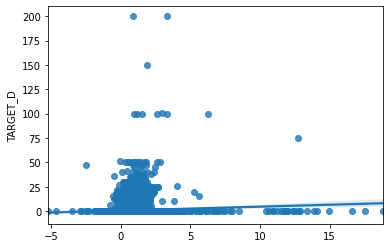

In [25]:
sns.regplot(preds, y_test)

Checking without all those zeros from people who did not donate:

In [26]:
y_test[y_test > 0]

CONTROLN
40338     21.0
74706     25.0
149569    28.0
150177    20.0
12874     10.0
          ... 
107052    10.0
93894     11.0
129945     7.0
69536      8.0
75910     10.0
Name: TARGET_D, Length: 1431, dtype: float64

In [27]:
y_test_above = y_test[y_test > 0].index
y_test_above

Int64Index([ 40338,  74706, 149569, 150177,  12874,   8204, 182573, 158935,
             45201, 119541,
            ...
            189531,  97736, 146463,  20533, 185052, 107052,  93894, 129945,
             69536,  75910],
           dtype='int64', name='CONTROLN', length=1431)

In [28]:
preds = model.predict(X_test.loc[y_test_above])
mae = mean_absolute_error(y_test.loc[y_test_above], preds)
mse = mean_squared_error(y_test.loc[y_test_above], preds, squared=False)
mae, mse

(14.952218569697315, 19.813078892616616)

<AxesSubplot:ylabel='TARGET_D'>

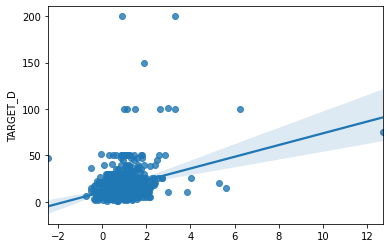

In [29]:
sns.regplot(preds, y_test.loc[y_test_above])

### Trying some log Scaling to see if the regression line fits better

In [30]:
# dataframe
X_no_zeros = X.applymap(lambda x: np.nan if x == 0 else x)
X_scaled = X_no_zeros.applymap(np.log).fillna(0)

0.0011056663392131627


<AxesSubplot:ylabel='TARGET_D'>

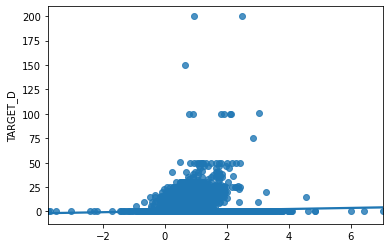

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

preds = model.predict(X_test)
sns.regplot(preds, y_test)

### Trying some Data "Balancing"

To try and get the zeros out of the way, we apply some data "balancing" - note that we are dealing with a regression problem, therefore the values are continuous. All I'm trying here is to diminish the influence of the non donors over the predictions.

In [32]:
index_to_keep = list(y[y > 0].index)
majority_sample = list(y[y == 0].sample(frac=.05).index)
len(index_to_keep), len(majority_sample)

(4837, 4522)

In [33]:
index_to_keep.extend(majority_sample)
len(index_to_keep)

9359

0.01800857341829465


<AxesSubplot:ylabel='TARGET_D'>

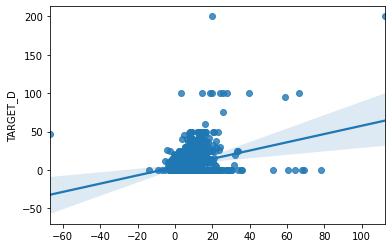

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[index_to_keep], y.loc[index_to_keep], test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

preds = model.predict(X_test)
sns.regplot(preds, y_test)

* no success

#### Trying a different model XGBOOST

-0.11973313926105966
mae: 1.5722902815055173 rmse: 4.7981735051191166


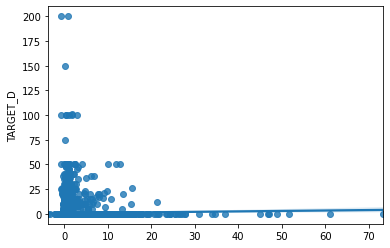

In [35]:
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

preds = model.predict(X_test)
sns.regplot(preds, y_test)

preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds, squared=False)
print(f'mae: {mae}', f'rmse: {mse}')

* no success

#### Conclusions

Predicting on a regression model has shown to be difficult. So let's try:

1 - Classification problem approach on TARGET_D (bucketing donated values);

2 - Classification model on TARGET_B (donated or not), to see if the info given on case study checks out;

3 - Check viability of classification model followed by regression model (removing the 'non donors' from the dataset for the regression).


### Trying a Classification Model by bucketing donated values

In [36]:
"""
# Then let's select our features
rfe = RFE(RandomForestClassifier(), n_features_to_select=30, verbose=False)
rfe.fit(X, y_class)
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = X.columns
cols_to_keep = df[df['Rank']==1]['Column_name']
cols_to_keep

cols_to_keep = ['DOB',
             'MALEVET',
             'POP901',
             'POP902',
             'POP903',
             'HHP1',
             'HHP2',
             'HV1',
             'HV2',
             'DMA',
             'IC1',
             'IC2',
             'IC3',
             'IC4',
             'IC5',
             'MC2',
             'PEC2',
             'TPE13',
             'LFC3',
             'LFC7',
             'EIC4',
             'OEDC5',
             'VC3',
             'POBC2',
             'NUMPROM',
             'RAMNTALL',
             'MINRDATE',
             'MAXRDATE',
             'FISTDATE',
             'AVGGIFT']

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-36-e89381830262>, line 39)

In [37]:
# First let's convert y into groups
y_class = y.apply(lambda x: 1 if x > 0 and x < 20 else 2 if x >= 20 else 0)

In [38]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report

model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3, random_state=42)

model.fit(X_train,y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27153
           1       0.00      0.00      0.00       961
           2       0.00      0.00      0.00       470

    accuracy                           0.95     28584
   macro avg       0.32      0.33      0.32     28584
weighted avg       0.90      0.95      0.93     28584



In [39]:
y_class.value_counts()

0    90443
1     3310
2     1527
Name: TARGET_D, dtype: int64

#### Downsampling - TomekLinks

In [40]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')

X_tl, y_tl = tl.fit_resample(np.array(X), y_class)

y_tl.value_counts()

# watch out not to inflate your metrics, ideally, you do the train-test split first and fit_resample only on the trainning set

0    88253
1     3310
2     1527
Name: TARGET_D, dtype: int64

In [41]:
# tomeklinks is sensitive to the columns we have
X.shape

(95280, 591)

In [42]:
model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=42)

model.fit(X_train,y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     26532
           1       0.00      0.00      0.00       952
           2       0.00      0.00      0.00       443

    accuracy                           0.95     27927
   macro avg       0.32      0.33      0.32     27927
weighted avg       0.90      0.95      0.93     27927



#### Upsamplig - SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3, random_state=42)

smote = SMOTE()

X_sm, y_sm = smote.fit_resample(np.array(X_train), y_train)
y_sm.value_counts()

0    63290
1    63290
2    63290
Name: TARGET_D, dtype: int64

In [44]:
model = RandomForestClassifier()

model.fit(X_sm,y_sm)

preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27153
           1       0.00      0.00      0.00       961
           2       0.00      0.00      0.00       470

    accuracy                           0.95     28584
   macro avg       0.32      0.33      0.32     28584
weighted avg       0.90      0.95      0.93     28584



#### Let's try a mix of the techniques we've learned

Logic: <br>
1 - I want to keep tomeklinks on the majority class (0) and also apply tomeklinks between 1 and 2 to remove borderline cases that might confuse our model; <br>
2 - I want to manually reduce the majority to 10% and apply SMOTE on the other 2.

In [45]:
y_0 = y_tl[y_tl == 0].sample(frac=0.1)

X_0 = X_tl[y_0.index] # note: X_tl is an array

y_1_2 = y_tl[(y_tl == 1) | (y_tl == 2)]

X_1_2 = X_tl[y_1_2.index]

tl = TomekLinks('majority')
X_tl_2, y_tl_2 = tl.fit_resample(X_1_2, y_1_2)

y_tl_2.value_counts(), len(y_0)

(1    2813
 2    1527
 Name: TARGET_D, dtype: int64,
 8825)

In [46]:
smote = SMOTE()

y_ = pd.concat([y_0, y_tl_2])
X_ = np.concatenate([X_0, X_tl_2])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=42)

X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

0    6134
1    6134
2    6134
Name: TARGET_D, dtype: int64

In [47]:
model = RandomForestClassifier()

model.fit(X_sm,y_sm)

preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      2691
           1       0.42      0.26      0.32       827
           2       0.10      0.01      0.02       432

    accuracy                           0.65      3950
   macro avg       0.40      0.38      0.37      3950
weighted avg       0.57      0.65      0.60      3950



Still not good enough for my purpose...

### Checking predictive power without people who did not donate

0.44936770429053996


<AxesSubplot:ylabel='TARGET_D'>

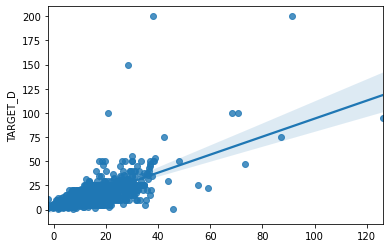

In [48]:
y_ = y[y>0]
X_ = X.loc[y_.index]

X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)
print(model.score(X_test,y_test))

preds = model.predict(X_test)
sns.regplot(preds, y_test)

In [49]:
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds, squared=False)
mae, mse

(5.201499887554536, 9.857978704713597)

Apparently, we can have good enough predictions if we take off the 'non donors', but that by itself won't solve our problem. SO let's check if we can predict TARGET_B good enough not to lose high amount donors:

#### Checking with a more robust model

Here I decided to check with the zeros, because of how SVM looks to 'slice' the data.

-0.023558979200398955


<AxesSubplot:ylabel='TARGET_D'>

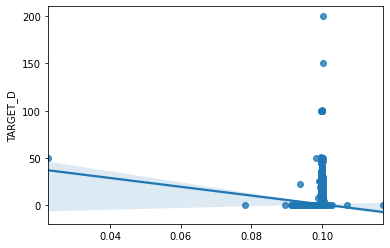

In [50]:
from sklearn.svm import SVR

y_ = y#[y>0]
X_ = X#.loc[y_.index]

X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=42)

model = SVR()

model.fit(X_train,y_train)
print(model.score(X_test,y_test))

preds = model.predict(X_test)
sns.regplot(preds, y_test)

In [51]:
# Bad results or something we can work with?

X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=42)

df = pd.DataFrame(y_test)
df['predicted'] = preds
df

,TARGET_D,predicted
CONTROLN,,
40338,21.0,0.099973
53354,0.0,0.099827
114502,0.0,0.100243
157022,0.0,0.099814
26654,0.0,0.099949
...,...,...
164527,0.0,0.099883
83213,0.0,0.099797
114032,0.0,0.099933


In [52]:
df[(df['TARGET_D'] == 0)].describe()

,TARGET_D,predicted
count,22646.0,22646.000000
mean,0.0,0.099942
std,0.0,0.000314
min,0.0,0.078047
25%,0.0,0.099881
50%,0.0,0.099939
75%,0.0,0.100001
max,0.0,0.117292


In [53]:
df[(df['TARGET_D'] > 0)].describe()

,TARGET_D,predicted
count,1174.000000,1174.000000
mean,15.653322,0.099879
std,12.484565,0.002277
min,1.000000,0.022320
25%,10.000000,0.099882
50%,14.000000,0.099941
75%,20.000000,0.100007
max,200.000000,0.100573


In [54]:
# we can try to find a threshold to get rid of some non donors

df[(df['TARGET_D'] > 0) & (df['predicted'] > 0.099) & (df['predicted'] < 0.1006)]

,TARGET_D,predicted
CONTROLN,,
40338,21.0,0.099973
74706,25.0,0.099966
149569,28.0,0.099937
150177,20.0,0.099911
12874,10.0,0.099919
...,...,...
93809,10.0,0.099878
143299,15.0,0.099829
158679,16.0,0.099838


In [55]:
df['send_mail'] = np.where((df['predicted'] > 0.098) & (df['predicted'] < 0.101), 1, 0)
df

,TARGET_D,predicted,send_mail
CONTROLN,,,
40338,21.0,0.099973,1
53354,0.0,0.099827,1
114502,0.0,0.100243,1
157022,0.0,0.099814,1
26654,0.0,0.099949,1
...,...,...,...
164527,0.0,0.099883,1
83213,0.0,0.099797,1
114032,0.0,0.099933,1


In [56]:
total_amount_spent_on_mail = len(df[df['send_mail'] > 0]) * 0.68
total_amount_spent_on_mail_everyone = len(df) * 0.68
total_missed_donations = sum(df[(df['send_mail'] == 0) & (df['TARGET_D'] > 0)]['TARGET_D'])
total_extra_spent_on_mail = round(len(df[(df['send_mail'] == 1) & (df['TARGET_D'] == 0)]) * 0.68, 2)

savings = round(total_amount_spent_on_mail_everyone - total_missed_donations - total_amount_spent_on_mail, 2)

if savings <= 0:
    print(f'This model is not worth it at the moment. Just mail everyone! Savings: {savings}')
else:
    print(f'This model saved ${savings} in mails. Missed ${total_missed_donations} in donations and wasted ${total_extra_spent_on_mail} in mails not responded.')

This model is not worth it at the moment. Just mail everyone! Savings: -39.36


### Trying TARGET_B prediction

In [23]:
y = data_no_nulls['TARGET_B']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#model = RandomForestClassifier()

#model.fit(X_train,y_train)
#preds = model.predict(X_test)
#print(classification_report(y_test, preds))

# good accuracy due to data imbalance

In [58]:
# Upsampling with SMOTE

smote = SMOTE()

X_sm, y_sm = smote.fit_resample(np.array(X_train), y_train)
y_sm.value_counts()

0    67797
1    67797
Name: TARGET_B, dtype: int64

In [59]:
model.fit(X_sm,y_sm)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22646
           1       0.00      0.00      0.00      1174

    accuracy                           0.95     23820
   macro avg       0.48      0.50      0.49     23820
weighted avg       0.90      0.95      0.93     23820



In [24]:
# Manual downsampling

y_0 = y[y == 0].sample(frac=0.05)
y_ = pd.concat([y_0, y[y==1]])
y_.value_counts()

1    4837
0    4522
Name: TARGET_B, dtype: int64

In [25]:
X_ = X.loc[y_.index]
X_

,AGE903,TPE7,AGEC6,POP901,EC2,EIC3,HV4,DOB,HHAGE2,OEDC7,...,RFA_15_S3F,RFA_15_S3G,RFA_15_S4D,RFA_15_S4E,RFA_15_S4F,RFA_15_S4G,RFA_15_U1F,PVASTATE_,PVASTATE_E,PVASTATE_P
CONTROLN,,,,,,,,,,,,,,,,,,,,,
43679,63,3,20,5013,9,11,3,1712,26,0,...,0,0,0,1,0,0,0,1,0,0
103870,47,0,12,912,6,7,2,0,8,5,...,0,0,0,0,0,0,0,1,0,0
60842,43,0,8,303,6,0,3,5108,3,0,...,0,0,0,0,0,0,0,1,0,0
128938,53,0,13,855,3,0,4,5504,5,0,...,0,0,0,0,1,0,0,1,0,0
180584,41,0,8,937,5,8,2,708,6,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154544,55,0,14,2649,11,19,4,5304,17,0,...,0,0,0,0,1,0,0,1,0,0
171302,37,0,8,8361,2,10,6,4701,5,0,...,0,0,0,0,0,0,0,1,0,0
78831,45,0,9,2368,4,3,5,1110,5,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_, y_, random_state=42)

model = RandomForestClassifier()

model.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      1127
           1       0.58      0.62      0.59      1213

    accuracy                           0.56      2340
   macro avg       0.56      0.56      0.56      2340
weighted avg       0.56      0.56      0.56      2340



In [29]:
df = pd.DataFrame(y_test)
df['send_mail'] = preds
df['TARGET_D'] = data_no_nulls.loc[df.index]['TARGET_D']
df

,TARGET_B,send_mail,TARGET_D
CONTROLN,,,
161627,1,0,21.0
178540,1,0,15.0
56449,1,1,5.0
143707,1,1,4.0
106865,0,0,0.0
...,...,...,...
119801,1,1,25.0
57929,1,1,10.0
95879,1,0,30.0


In [30]:
total_amount_spent_on_mail = len(df[df['send_mail'] > 0]) * 0.68
total_amount_spent_on_mail_everyone = len(df) * 0.68
total_missed_donations = sum(df[(df['send_mail'] == 0) & (df['TARGET_D'] > 0)]['TARGET_D'])
total_extra_spent_on_mail = round(len(df[(df['send_mail'] == 1) & (df['TARGET_B'] == 0)]) * 0.68, 2)

savings = round(total_amount_spent_on_mail_everyone - total_missed_donations - total_amount_spent_on_mail, 2)

if savings <= 0:
    print(f'This model is not worth it at the moment. Just mail everyone! Savings: {savings}')
else:
    print(f'This model saved ${savings} in mails. Missed ${total_missed_donations} in donations and wasted ${total_extra_spent_on_mail} in mails not responded.')

This model is not worth it at the moment. Just mail everyone! Savings: -8294.33


#### Checking another model

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_class, random_state=42)

model = SVC(probability=True, class_weight='balanced')

model.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

In [ ]:
df = pd.DataFrame(y_test)
df['send_mail'] = preds
df

In [ ]:
total_amount_spent_on_mail = len(df[df['send_mail'] > 0]) * 0.68
total_amount_spent_on_mail_everyone = len(df) * 0.68
total_missed_donations = sum(df[(df['send_mail'] == 0) & (df['TARGET_B'] > 0)]['TARGET_B'])
total_extra_spent_on_mail = round(len(df[(df['send_mail'] == 1) & (df['TARGET_B'] == 0)]) * 0.68, 2)

savings = round(total_amount_spent_on_mail_everyone - total_missed_donations - total_amount_spent_on_mail, 2)

if savings <= 0:
    print(f'This model is not worth it at the moment. Just mail everyone! Savings: {savings}')
else:
    print(f'This model saved ${savings} in mails. Missed ${total_missed_donations} in donations and wasted ${total_extra_spent_on_mail} in mails not responded.')

### Analyzing results

In [31]:
proba = pd.DataFrame(model.predict_proba(X_test)).set_index(y_test.index)
proba

,0,1
CONTROLN,,
161627,0.54,0.46
178540,0.54,0.46
56449,0.41,0.59
143707,0.39,0.61
106865,0.60,0.40
...,...,...
119801,0.45,0.55
57929,0.47,0.53
95879,0.52,0.48


In [32]:
df = pd.DataFrame(y_test).merge(data_no_nulls['TARGET_D'], left_index=True, right_index=True)
df[['prob_0', 'prob_1']] = proba
df.sort_values('prob_1', ascending=False).head(30)

,TARGET_B,TARGET_D,prob_0,prob_1
CONTROLN,,,,
20012,1,5.00,0.15,0.85
42176,1,10.00,0.16,0.84
4017,1,15.00,0.19,0.81
2194,1,4.00,0.19,0.81
135454,1,15.00,0.22,0.78
7494,1,6.00,0.22,0.78
18266,1,5.00,0.22,0.78
27624,1,8.00,0.23,0.77
36479,1,10.00,0.23,0.77


In [33]:
df.corr()['TARGET_D']
# barelly any correlation between probabilities and amount donated

TARGET_B    0.712457
TARGET_D    1.000000
prob_0      0.053204
prob_1     -0.053204
Name: TARGET_D, dtype: float64

In [34]:
df.describe()

,TARGET_B,TARGET_D,prob_0,prob_1
count,2340.000000,2340.000000,2340.000000,2340.000000
mean,0.518376,8.025483,0.482342,0.517658
std,0.499769,10.860172,0.099665,0.099665
min,0.000000,0.000000,0.150000,0.190000
25%,0.000000,0.000000,0.420000,0.450000
50%,1.000000,4.000000,0.480000,0.520000
75%,1.000000,15.000000,0.550000,0.580000
max,1.000000,100.000000,0.810000,0.850000


Not ideal, but let's use it...

In [ ]:
# Feature Selection for the classification model
cols_to_keep = dict(sorted(zip(X_.columns, model.feature_importances_), key=lambda x: x[1], reverse=True)[:50])
cols_to_keep

In [ ]:
### Let's pretend we have a decent prediction

X_train, X_test, y_train, y_test = train_test_split(X_[cols_to_keep], y_, random_state=42)

classifier = RandomForestClassifier()

classifier.fit(X_train,y_train)
preds = classifier.predict(X_test)
print(classification_report(y_test, preds))

## Hyperparameter Tunning

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

# Classification Model

X_train, X_test, y_train, y_test_c = train_test_split(X_[cols_to_keep], y_, test_size=0.3, random_state=42)


param_grid = {
    'criterion': ['entropy'],
    #'n_estimators': [50, 100],
    #'min_samples_split': [2, 4],
    #'min_samples_leaf': [1, 2],
    #'max_features': ['sqrt', 'auto', 'log2'],
    #'max_samples': [None, 0.5],
    'bootstrap': [True, False],
    'max_depth': [5, 10, 50, None]
    }

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True, n_jobs=-1)

grid_search.fit(X_train,y_train)
grid_search.best_params_

In [ ]:
classifier = grid_search.best_estimator_

In [71]:
# Regression Model

y_reg = data_no_nulls['TARGET_D'].loc[y_.index]

X_train, X_test, y_train, y_test_r = train_test_split(X_[cols_to_keep], y_reg, test_size=0.3, random_state=42)

param_grid = {
    'criterion': ['mse'],
    #'n_estimators': [50, 100],
    #'min_samples_split': [2, 4],
    #'min_samples_leaf': [1, 2],
    #'max_features': ['sqrt', 'auto', 'log2'],
    #'max_samples': [None, 0.5],
    'bootstrap': [True, False],
    'max_depth': [5, 10, 50, None],
    #'learning_rate': [0.01, 0.05, 0.001]
    }

model = XGBRegressor(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', return_train_score=True, n_jobs=-1)

grid_search.fit(np.array(X_train),y_train)
grid_search.best_params_

[15:24:45] WARNING: ../src/learner.cc:541: 
Parameters: { bootstrap, criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




{'bootstrap': True, 'criterion': 'mse', 'max_depth': 5}

In [149]:
regressor = grid_search.best_estimator_

In [108]:
# METRICS

preds = classifier.predict(X_test)
print(classification_report(y_test_c, preds))

              precision    recall  f1-score   support

           0       0.57      0.47      0.51      1362
           1       0.57      0.67      0.62      1446

    accuracy                           0.57      2808
   macro avg       0.57      0.57      0.57      2808
weighted avg       0.57      0.57      0.57      2808



-0.2356229391110738 8.601960445541007 11.853383692485531


<AxesSubplot:ylabel='TARGET_D'>

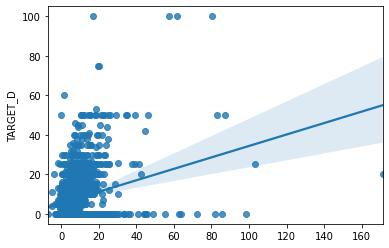

In [114]:
# we are still not applying the non-donors "filter"
preds = regressor.predict(np.array(X_test))
mae = mean_absolute_error(y_test_r, preds)
mse = mean_squared_error(y_test_r, preds, squared=False)
print(regressor.score(np.array(X_test), y_test_r), mae, mse)
sns.regplot(preds, y_test)

### Testing

In [115]:
X_train, X_test, y_train, y_test_r = train_test_split(X_[cols_to_keep], y_reg, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test_c = train_test_split(X_[cols_to_keep], y_, test_size=0.3, random_state=42)

df = pd.concat([y_test_c, y_test_r], axis=1)
   
df['all_predicted_amount'] = regressor.predict(np.array(X_test))
df['predicted_donor'] = classifier.predict(X_test)
df['predicted_amount'] = np.where(df['predicted_donor'] == 1, df['all_predicted_amount'], 0)
df

,TARGET_B,TARGET_D,all_predicted_amount,predicted_donor,predicted_amount
CONTROLN,,,,,
161627,1,21.0,4.978024,1,4.978024
178540,1,15.0,7.328735,1,7.328735
56449,1,5.0,0.667845,1,0.667845
143707,1,4.0,0.083995,1,0.083995
151703,0,0.0,10.797636,1,10.797636
...,...,...,...,...,...
161309,1,18.0,7.507896,1,7.507896
77605,1,15.0,1.313035,0,0.000000
39121,0,0.0,4.815041,1,4.815041


Considering that the value per mail is $0.68, if we applied the model we would have:



In [118]:
total_amount_donated = sum(df['TARGET_D'])
total_amount_spent_on_mail = len(df[df['predicted_amount'] > 0]['TARGET_D']) * 0.68
total_missed_donations = sum(df[(df['predicted_amount'] == 0) & (df['TARGET_D'] > 0)]['TARGET_D'])
total_extra_spent_on_mail = len(df[(df['predicted_amount'] > 0) & (df['TARGET_D'] == 0)]) * 0.68
total_amount_spent_on_mail_everyone = len(df) * 0.68

savings = total_amount_spent_on_mail_everyone - total_missed_donations - total_amount_spent_on_mail

if total_missed_donations >= total_amount_spent_on_mail_everyone:
    print(f'This model is not worth it at the moment. Just mail everyone! Savings: {savings}')
else:
    print(f'This model saved ${savings} in mails. Missed ${total_missed_donations} in donations and wasted ${total_extra_spent_on_mail} in mails not responded.')

This model is not worth it at the moment. Just mail everyone! Savings: -8786.369999999999


In [153]:
def savings_score(X_test, y_test_c, y_test_r, cls, reg):
    
    df = pd.concat([y_test_c, y_test_r], axis=1)
    df['all_predicted_amount'] = reg.predict(np.array(X_test))
    df['predicted_donor'] = cls.predict(np.array(X_test))
    df['predicted_amount'] = np.where(df['predicted_donor'] == 1, df['all_predicted_amount'], 0)
    
    total_amount_spent_on_mail_everyone = len(df) * 0.68
    total_amount_spent_on_mail = len(df[df['predicted_amount'] > 0]['TARGET_D']) * 0.68
    total_missed_donations = sum(df[(df['predicted_amount'] == 0) & (df['TARGET_D'] > 0)]['TARGET_D'])
    
    savings = total_amount_spent_on_mail_everyone - total_amount_spent_on_mail - total_missed_donations 
    
    return round(savings, 2)

savings_score(X_test, y_test_c, y_test_r, classifier, regressor)

-20263.19

### Going Crazy

In [164]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import time

start = time.time()

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(np.array(X_), y_, test_size=0.3, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(np.array(X_), y_reg, test_size=0.3, random_state=42)

scalers = [Normalizer(), StandardScaler()]
cls_models = [LogisticRegression, RandomForestClassifier]
reg_models = [LinearRegression, RandomForestRegressor]
sav_score = 0

param_grid = {
    LogisticRegression:
        {
            'penalty': ['l2', 'elasticnet'],
            'solver': ['newton-cg', 'lbfgs', 'saga']
        },
    RandomForestClassifier:
        {
            'criterion': ['gini', 'entropy'],
            #'n_estimators': [50, 100],
            #'min_samples_split': [2, 4],
            #'min_samples_leaf': [1, 2],
            #'max_features': ['sqrt', 'auto', 'log2'],
            #'max_samples': [None, 0.5],
            'bootstrap': [True, False],
            'max_depth': [10, 50, None],
        },
    LinearRegression:
        {
            'normalize': [True, False]
        },
    RandomForestRegressor:
        {
            'criterion': ['mse', 'mae'],
            #'n_estimators': [50, 100],
            #'min_samples_split': [2, 4],
            #'min_samples_leaf': [1, 2],
            #'max_features': ['sqrt', 'auto', 'log2'],
            #'max_samples': [None, 0.5],
            'bootstrap': [True, False],
            'max_depth': [10, 50, None],
        }
    }


for scaler in scalers:
    for reg in reg_models:
        for cls in cls_models:
                        
            cls_gs = GridSearchCV(cls(), param_grid[cls], cv=5, return_train_score=True, n_jobs=5)
            reg_gs = GridSearchCV(reg(), param_grid[reg], cv=5, return_train_score=True, n_jobs=5)
            
            cls_pipe = Pipeline([('scaler', scaler), ('model', cls_gs)], verbose=True)
            reg_pipe = Pipeline([('scaler', scaler), ('model', reg_gs)], verbose=True)
            
            cls_pipe.fit(X_train_c, y_train_c)
            reg_pipe.fit(X_train_r, y_train_r)
            
            c_score = cls_pipe.score(X_test_c, y_test_c)
            r_score = reg_pipe.score(X_test_r, y_test_r)
                
            savings = savings_score(X_test_c, y_test_c, y_test_r, cls_pipe, reg_pipe)
            
            if savings > sav_score:
                sav_score = savings
                classifier = cls_pipe.named_steps['model']
                regressor = reg_pipe.named_steps['model']
            
            print(f'Savings: {savings}')
            print(f'Reg Score: {round(r_score ,2)}.')
            print(f'Model: {reg_pipe.named_steps.values()}')
            print(f'Cls Score: {round(c_score ,2)}.')
            print(f'Model: {cls_pipe.named_steps.values()}')
            print()
    
if classifier and regressor:
    print(f'Final choice with saving of ${sav_score}: {classifier}, {regressor}')
else:
    print('This model is not worth it at the moment. Just mail everyone!')
    print(classifier)
    print(regressor)
    
end = time.time()

print(f'Time to process: {end-start}')

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   4.2s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.3s
Savings: -3285.68
Reg Score: -0.38.
Model: dict_values([Normalizer(), GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=5,
             param_grid={'normalize': [True, False]}, return_train_score=True)])
Cls Score: 0.54.
Model: dict_values([Normalizer(), GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=5,
             param_grid={'penalty': ['l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'saga']},
             return_train_score=True)])

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total= 1.7min
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ...

Exception in thread Thread-16:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/felipe/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 567, in run
    self.flag_executor_shutting_down()
  File "/home/felipe/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 756, in flag_executor_shutting_down
    self.kill_workers()
  File "/home/felipe/.local/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 766, in kill_workers
    recursive_terminate(p)
  File "/home/felipe/.local/lib/python3.8/site-packages/joblib/externals/loky/backend/utils.py", line 28, in recursive_terminate
    _recursive_terminate_without_psutil(process)
  File "/home/felipe/.local/lib/python3.8/site-packages/joblib/externals/loky/backend/utils.py", line 53, in _recursive_terminate_without_psutil
    _recursive_terminate(process.pid)
  File "/hom

KeyboardInterrupt: 

In [ ]:
# Saving pipeline
import pickle

with open('reg_model.pkl', 'wb') as file:
    file.dump(regressor)

with open('cls_model.pkl', 'wb') as file:
    file.dump(classifier)

## Conclusions

Always focus on the problem you are trying to solve. In this case, we want to avoid spending on mail to people who won't donate (since donations are above the mail cost).

Since we end up losing high amount donors on the classification model, we tried predicting the amount donated, which is also not giving good enough predictions at the moment.

To achieve our goal, we need to minize cost while also minizing donations loss. A calculation that can help us deciding the best model / approach would be considering: (total spent on mail to everyone) - (the actual amount spent on mail) - (total amount lost in donations)

### Other Feature Selection Methods

In this case I'd leave feature selection to the end, just to fine tune the model.

#### Principal Component Analysis (PCA)
Not exactly Feature Selection. The idea is to reduce dimensionality, by keeping the most important information from the features.

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train, y_train)

X_train_ = pca.transform(X_train)
X_test_ = pca.transform(X_test)

X_train_.shape

(7019, 10)

In [61]:
model = RandomForestClassifier()

model.fit(X_train_,y_train)
preds = model.predict(X_test_)
print(classification_report(y_test, preds))
# didn't work well for the classification part of the problem

              precision    recall  f1-score   support

           0       0.50      0.47      0.48      1127
           1       0.54      0.57      0.55      1213

    accuracy                           0.52      2340
   macro avg       0.52      0.52      0.52      2340
weighted avg       0.52      0.52      0.52      2340



#### Variance Threshold

In [62]:
# Using the variance threshold technique
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.9))
# This drops the columns that have a variance less than this threshold
selection.fit(X.loc[index_to_keep])
temp = selection.transform(X.loc[index_to_keep])
temp = pd.DataFrame(temp)
X.shape, temp.shape

# i'm applying here with the categoricals together, which might not be a good idea

((95280, 591), (9359, 305))

In [63]:
removed_columns = pd.DataFrame(data=(X.columns,selection.variances_,selection.get_support()), index=('column_name','variance','statement')).T
removed_columns

,column_name,variance,statement
0,OCC10,34.921818,True
1,ANC2,17.837526,True
2,HC17,769.204315,True
3,PEC1,37.208549,True
4,CHILC4,21.153656,True
...,...,...,...
586,SOLP3_,0.001920,False
587,SOLP3_0,0.001067,False
588,SOLP3_1,0.000107,False
589,SOLP3_12,0.000534,False


In [64]:
cols_to_keep = removed_columns[removed_columns['statement'] == False]['column_name']
cols_to_keep

17         ETH6
18        MHUC2
86         TPE6
90        ANC11
138        ANC6
         ...   
586     SOLP3_ 
587     SOLP3_0
588     SOLP3_1
589    SOLP3_12
590     SOLP3_2
Name: column_name, Length: 286, dtype: object

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_[cols_to_keep], y_, test_size=0.3, random_state=42)

model = RandomForestClassifier()

model.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53      1362
           1       0.57      0.60      0.58      1446

    accuracy                           0.56      2808
   macro avg       0.56      0.56      0.56      2808
weighted avg       0.56      0.56      0.56      2808



#### RFE

In [66]:
from sklearn.feature_selection import RFE

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=42)

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=50, step=10, verbose=False)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=50, step=10,
    verbose=False)

In [67]:
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = X.columns
cols_to_keep = df[df['Rank']==1]['Column_name']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_[cols_to_keep], y_, test_size=0.3, random_state=42)

model.fit(X_train,y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1362
           1       0.58      0.62      0.60      1446

    accuracy                           0.57      2808
   macro avg       0.57      0.57      0.57      2808
weighted avg       0.57      0.57      0.57      2808

